# **Hierarical clustering:-**
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## **Agglomerative Clustering**

In [109]:
from sklearn.datasets import load_iris
iris=load_iris()

In [110]:
df=pd.DataFrame(iris.data,columns=["sepal_length","sepal_width","petal_length","petal_width"])
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### **Standardization**

In [111]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [112]:
x_scaled=scaler.fit_transform(df)

In [113]:
x_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [114]:
x_scaled.shape

(150, 4)

## **Dimensonlaty reduction:-**

In [115]:
from sklearn.decomposition import PCA

In [116]:
pca=PCA(n_components=2)
pca_scaled=pca.fit_transform(df)

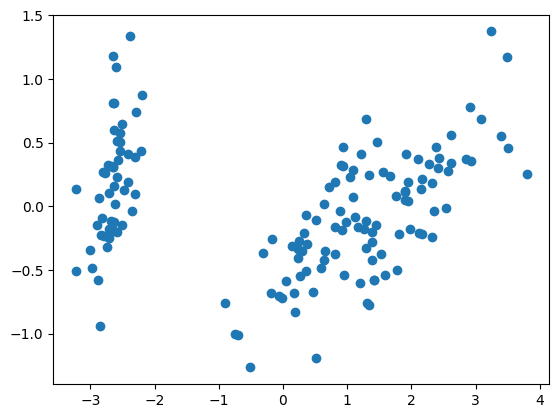

In [117]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1])

### Agglomerative clustering:-

Text(0, 0.5, 'Eucledian distance')

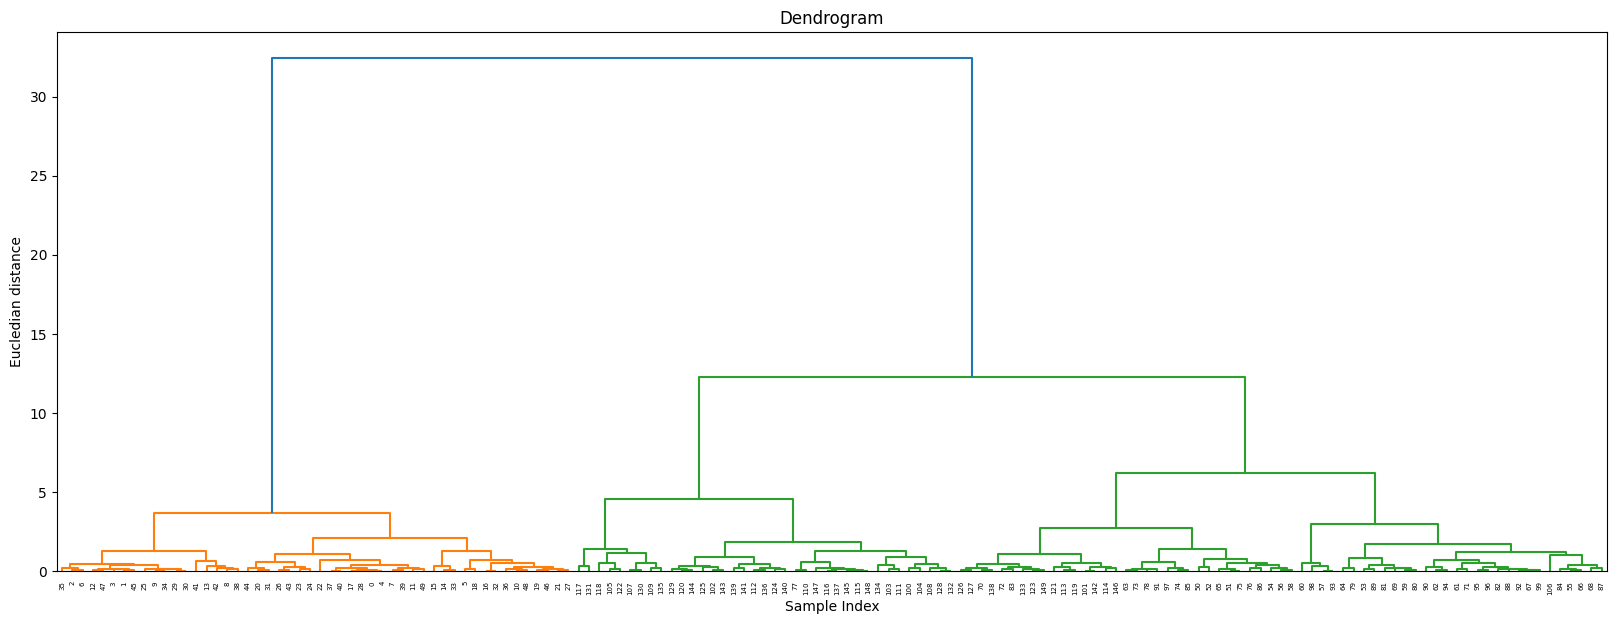

In [118]:
import scipy.cluster.hierarchy as sc#To construct a dendogram
## plot the dendogram
plt.figure(figsize=(20,7))
plt.title("Dendrogram")
# create dendogram
sc.dendrogram(sc.linkage(pca_scaled,method="ward"))#this is a fix line for dendrogram plot
plt.title("Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Eucledian distance")

### **here we can se that our no of cluster is 2**

In [119]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,affinity="euclidean",linkage="ward")
cluster.fit(pca_scaled)

C:\Users\Abhi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean')

In [120]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

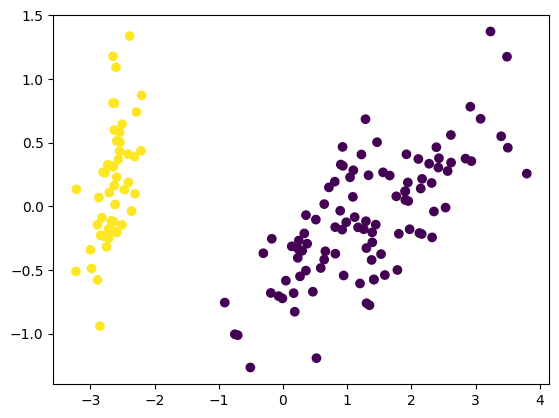

In [121]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)

## silhouette score:-

In [122]:
from sklearn.metrics import silhouette_score

In [123]:
silhouette_coefficients=[]
# Notice you start at 2 cluster for silhouette_coefficients
for k in range(2,11):
    agglo=AgglomerativeClustering(n_clusters=k,affinity="euclidean",linkage="ward")
    labels = agglo.fit_predict(x_scaled)
    score=silhouette_score(x_scaled,labels)
    silhouette_coefficients.append(score)

C:\Users\Abhi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Abhi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Abhi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Abhi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Abhi\AppData\Roaming\Python\Python311\site-packages\sklearn

Text(0, 0.5, 'Silhouette coefficients')

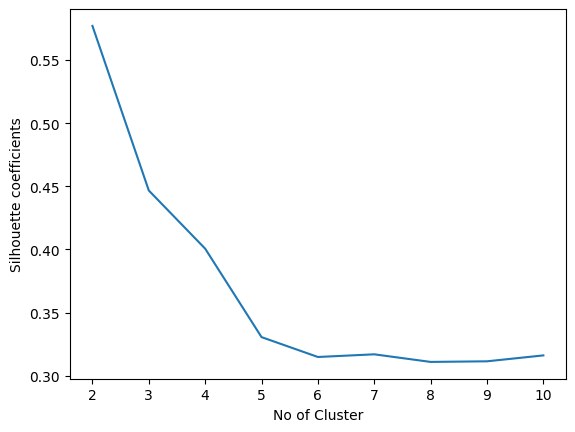

In [124]:
# ploting silhouette score value
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("No of Cluster")
plt.ylabel("Silhouette coefficients")